<a href="https://colab.research.google.com/github/ct32/CS301/blob/main/301project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

Created by Andrew Snedeker, Caterine Tapia, and Christian Saliski with the use of open source material from

https://www.kaggle.com/kdnishanth/characterrecognitionfromnumberplate/

https://www.kaggle.com/nainikagaur/mobilenet-v2-implementation

https://www.kaggle.com/sweta88/notebook0e193408a2

https://keras.io/api/callbacks/reduce_lr_on_plateau/

https://keras.io/api/models/sequential/

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization

https://keras.io/api/layers/activations/#softmax-function

https://www.applause.com/blog/training-data-validation-data-vs-test-data

https://medium.com/analytics-vidhya/understanding-image-augmentation-using-keras-tensorflow-a6341669d9ca

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

In [ ]:
import numpy as np
import pandas as pd
import cv2
import imutils
import os
import easyocr
from matplotlib import pyplot as plt
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Training and validation sets obtained from https://www.kaggle.com/kdnishanth/characterrecognitionfromnumberplate/
# and https://www.kaggle.com/sweta88/notebook0e193408a2

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2) #allocated 20% of the training set to be used as validation

test_datagen = ImageDataGenerator(
    rescale=1./255,)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Training Data',
    target_size=(42, 42),
    batch_size=32,
    class_mode='categorical',
    subset='training')


validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Training Data',
    target_size=(42, 42),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Testing Data',
    target_size = (42,42),
    batch_size = 32,
    class_mode='categorical')

Found 24530 images belonging to 36 classes.
Found 6104 images belonging to 36 classes.
Found 396 images belonging to 36 classes.


In [ ]:
#This neural network was obtained from https://www.kaggle.com/sweta88/notebook0e193408a2

model = keras.Sequential([
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(42,42,3)),
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = 'same'),
        layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.BatchNormalization(),
        layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding = 'same'),
        layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(256, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(36, activation='softmax')])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("./model/", save_best_only=True, verbose=1, monitor='val_accuracy', mode='auto')
learningRate = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, mode='auto')

In [ ]:
with tf.device('/GPU:0'):
    history=model.fit(x=train_generator, validation_data=validation_generator, epochs=10, shuffle=True, callbacks=[checkpoint, learningRate])

Epoch 1/10
767/767 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.9005
Epoch 00001: val_accuracy improved from -inf to 0.94610, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets
767/767 [==============================] - 4244s 6s/step - loss: 0.3212 - accuracy: 0.9005 - val_loss: 0.1908 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 2/10
767/767 [==============================] - ETA: 0s - loss: 0.1463 - accuracy: 0.9565
Epoch 00002: val_accuracy improved from 0.94610 to 0.98100, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets
767/767 [==============================] - 103s 134ms/step - loss: 0.1463 - accuracy: 0.9565 - val_loss: 0.0765 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 3/10
767/767 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9673
Epoch 00003: val_accuracy did not improve from 0.98100
767/767 [==============================] - 100s 130ms/step - loss: 0.1098 - accuracy: 0.9673 - v

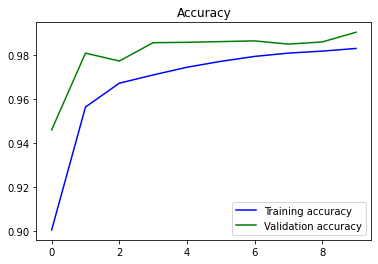

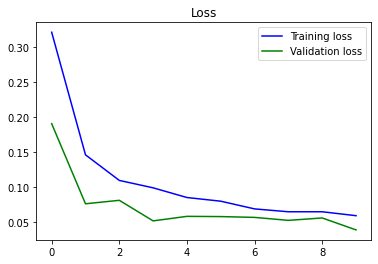

In [ ]:
accuracy = history.history['accuracy']
validationAccurcy = history.history['val_accuracy']
loss = history.history['loss']
validationLoss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, validationAccurcy, 'g-', label='Validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, validationLoss, 'g-', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()
#model_1 plot below

In [ ]:
d = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}

In [ ]:
model.save("/content/drive/MyDrive/model_1.h5")
model.save_weights("/content/drive/MyDrive/weights_1.h5")

In [ ]:
#need to reload model because collab disconnected
model = keras.models.load_model('/content/drive/MyDrive/model_1.h5')

In [ ]:
import glob
path = "/content/drive/MyDrive/archive/Testing Data/class_Y/*.*"
for file in glob.glob(path):
  img = cv2.imread(file)
  img = cv2.resize(img,(42,42))
  img = np.expand_dims(img, axis = 0)
  
  prediction = model.predict(img)
  output = pd.DataFrame(prediction)
  maxIdx = list(output.idxmax(axis=1))
  print("Recognized as", d[maxIdx[0]])
  print()

Recognized as Y

Recognized as Y

Recognized as Y

Recognized as Y

Recognized as Y

Recognized as Y



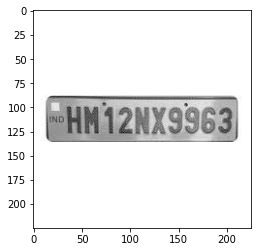

In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive/Validation/2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

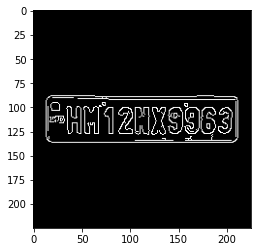

In [ ]:
#switches the above gray image to this black and white image for edge detection

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #noise detection
edged= cv2.Canny(bfilter, 30, 200) #edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours= sorted(contours, key = cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
  approx=cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
      location = approx
      break
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
(x,y)= np.where(mask == 255)
(x1, y1) =(np.min(x), np.min(y))
(x2, y2)= (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

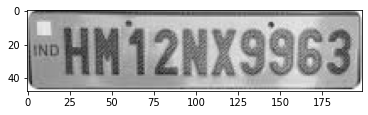

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
#These two functions were obtained from https://www.kaggle.com/nainikagaur/mobilenet-v2-implementation

# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
     
    
    plt.show()
    
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_gray_lp = image
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    
    plt.show()
    
    cv2.imwrite('contour.jpg',img_binary_lp)
    

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

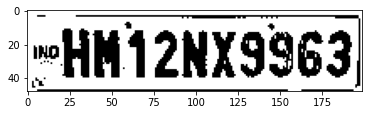

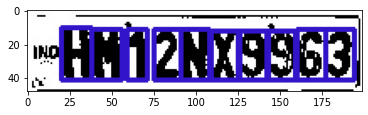

In [ ]:
char = segment_characters(cropped_image)

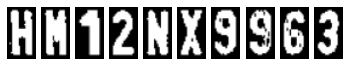

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [ ]:
plt.imshow(char[5], cmap='gray')

In [ ]:
name_array=["image.jpg","image1.jpg","image2.jpg","image3.jpg","image4.jpg","image5.jpg","image6.jpg","image7.jpg","image8.jpg","image9.jpg",]
path = "/content/drive/MyDrive/characters/*.*"
x = sorted(glob.glob(path))
for file in x:
  img = cv2.imread(file) #read image
  img = cv2.resize(img,(42,42)) #resize image
  img = np.expand_dims(img, axis = 0)
  
  #print(file)
  prediction = model.predict(img) #predicts image
  output = pd.DataFrame(prediction) 
  maxIdx = list(output.idxmax(axis=1)) 
  #print(maxIdx)
  print(d[maxIdx[0]], end='') #print each letter read


R27ZRXSSGB

In [ ]:
#easyocr to read from their pre-trained model
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print("Result: ", result[0][1])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Result:  HM12NX9963]
